In [1]:
import tensorflow as tf
import numpy as np
import datetime
import os
import pathlib
import matplotlib.pyplot as plt
import PIL

In [2]:
%load_ext tensorboard
!mkdir "logs/"
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [4]:
%tensorboard --logdir logs


Reusing TensorBoard on port 6006 (pid 40184), started 0:00:13 ago. (Use '!kill 40184' to kill it.)

In [6]:
# import glob
# import os
# def change_some_images(path, final_location, resolution):
#     for i,filename in enumerate(glob.glob(os.path.join(path, '*'))):
#         temp = tf.io.decode_png(tf.io.read_file(filename),3)
#         temp = tf.image.resize_with_pad(temp, resolution,resolution).numpy().astype("uint8")
#         tf.io.write_file(final_location+str(i)+".png", tf.io.encode_png(temp))
            
# change_some_images("./DIV2K_train_HR","./training images/X/", 256)
# change_some_images("./DIV2K_train_HR","./training images/y/", 512)
            



In [7]:
def process_images(filename):    
    image = tf.io.read_file(filename)
    image = tf.io.decode_png(image)
    image = tf.image.convert_image_dtype(image, tf.float32)

    return image

In [8]:
def parse_image(filename_X, filename_y):
    
    label = process_images(filename_y)

    image = process_images(filename_X)
    return image, label

In [9]:
X_file_name = tf.data.Dataset.list_files("training images/X/*.png", seed=42)
y_file_name = tf.data.Dataset.list_files("training images/y/*.png", seed=42)

In [136]:
# # old things that where required for learning
# data_dir_X= pathlib.Path("training images/X")
# data_dir_y = pathlib.Path("training images/y")

# filenames_X = list(data_dir_X.glob("*.png"))
# filenames_y = list(data_dir_y.glob("*.png"))

# filename_X = next(iter(X_file_name))
# filename_y = next(iter(y_file_name))

# images, labels = parse_image(filename_X, filename_y)
# dataset = tf.data.Dataset.from_tensors((images, labels))

# dataset_1 = tf.data.Dataset.from_tensor_slices(images)
# dataset_2 = tf.data.Dataset.from_tensor_slices(labels)

# dataset_3 = tf.data.Dataset.zip((dataset_1, dataset_2))

In [10]:
# minor updates only
dataset_4 = tf.data.Dataset.zip((X_file_name, y_file_name))
images_ds = dataset_4.map(parse_image).batch(32, drop_remainder=True)

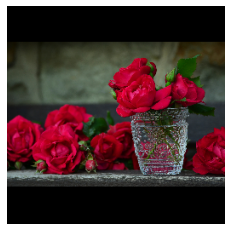

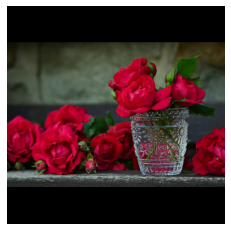

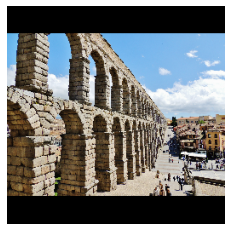

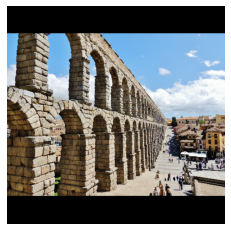

In [13]:
for image, label in images_ds.take(2):
      plt.figure()
      plt.imshow(image[0])
      plt.axis('off')
      plt.show()
      plt.figure()
      plt.imshow(label[0])
      plt.axis('off')